### Anas Puthawala - CS 430 Homework 3

### Problem 1b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime
import timeit

import seaborn as sns

In [2]:
def make_exp(tau):
    '''Inputs: np array of 1000 random uniform variables ranging from 0-1
       Outputs: np array of 1000 variables converted to exponential distribution from the U 
       and the U itself'''
    
    # Setting seed
#     random.seed(datetime.now())
    random.seed(21)
    
    
    #Random uniform distribution
    U = np.random.uniform(low=0,high=1,size=1000)

    return np.array((-1*tau)*np.log(U)), np.array(U)

In [3]:
U_exp, U = make_exp(tau=1) # Letting tau = 1 in this case

#### Plotting U

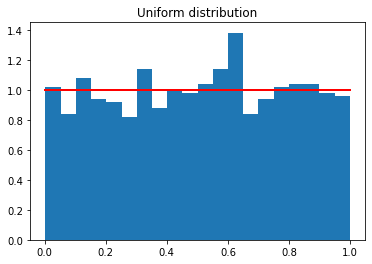

In [50]:
count, bins, ignored = plt.hist(U, 20, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.title('Uniform distribution')
plt.show()

#### Plotting U_exp

/home/yueqingliang/miniconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


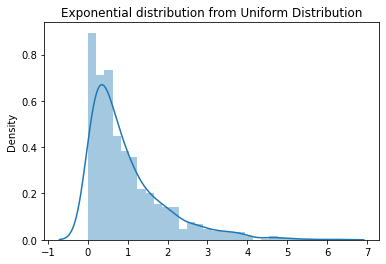

In [49]:
sns.distplot(U_exp)
plt.title('Exponential distribution from Uniform Distribution')
plt.show()

In [11]:
print(f'The mean for U_exp is: {np.mean(U_exp)}')
print(f'The mean for U is: {np.mean(U)}')

The mean for U_exp is: 0.9665994797438207
The mean for U is: 0.5069054610786418


### Here's how a exponential distribution should look like:
(Source: Google)

In [12]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/WrappedExponentialPDF.png/325px-WrappedExponentialPDF.png')

### Problem 1c

#### Generate T, an np array populated by pulling values from the exponential distribution

Assuming 
<center>$\tau$$_1$ = 10</center>
<center>$\tau$$_2$ = 15</center>
<center>$\tau$$_3$ = 25</center>

In [13]:
def make_exp2(tau):
    '''Inputs: np array of 1000 random uniform variables ranging from 0-1
       Outputs: np array of 1000 variables converted to exponential distribution from the random uniform dist.'''
    
    # Setting seed
    random.seed(datetime.now())
    
    #Random uniform distribution
    U = np.random.uniform(low=0,high=1,size=1000)

    return np.array((-1*tau)*np.log(U))

In [14]:
taus = [10, 15, 25]

T = np.array([make_exp2(tau) for tau in taus])

In [15]:
print(f'The shape of T is: {T.shape}')

The shape of T is: (3, 1000)


In [16]:
print(f'The mean of the exponentially distributed sequences corresponding to Tau = {taus[0]} is {np.mean(T[0])}\n')
print(f'The mean of the exponentially distributed sequences corresponding to Tau = {taus[1]} is {np.mean(T[1])}\n')
print(f'The mean of the exponentially distributed sequences corresponding to Tau = {taus[2]} is {np.mean(T[2])}\n')

The mean of the exponentially distributed sequences corresponding to Tau = 10 is 10.853588151894405

The mean of the exponentially distributed sequences corresponding to Tau = 15 is 15.064248883488089

The mean of the exponentially distributed sequences corresponding to Tau = 25 is 24.782254355789178



In [17]:
seq1, seq2, seq3 = T[0], T[1], T[2]

### Sorting

<center>We will use Python implementation of QuickSort using Hoare's partition scheme.</center>

In [18]:
def partition(arr, low, high):
    '''Hoares partitioning scheme'''
 
    pivot = arr[low]
    i = low - 1
    j = high + 1
 
    while (True):
 
        # Find leftmost element greater than
        # or equal to pivot
        i += 1
        while (arr[i] < pivot):
            i += 1
 
        # Find rightmost element smaller than
        # or equal to pivot
        j -= 1
        while (arr[j] > pivot):
            j -= 1
 
        # If two pointers met.
        if (i >= j):
            return j
 
        arr[i], arr[j] = arr[j], arr[i]

In [19]:
def qs(arr, low, high):
    ''' pi is partitioning index, arr[p] is now
    at right place '''
    if (low < high):
 
        pi = partition(arr, low, high)
 
        # Separately sort elements before
        # partition and after partition
        qs(arr, low, pi)
        qs(arr, pi + 1, high)

In [20]:
def sort(arr):
    '''Input: Array to be sorted
       Output: None'''
    is_sorted = lambda a: np.all(a[:-1] <= a[1:])
    
    if not is_sorted(arr):
        print('Sorting...')
        start= timeit.default_timer()
        qs(arr, low=0, high=len(seq1)-1)
        end = timeit.default_timer()
        
        print(f'Sorting complete\nTime elapsed: {end-start}')
    else:
        print('Already sorted')

In [21]:
sort(seq1)

Sorting...
Sorting complete
Time elapsed: 0.005768959876149893


In [22]:
sort(seq2)

Sorting...
Sorting complete
Time elapsed: 0.005549047142267227


In [23]:
sort(seq3)

Sorting...
Sorting complete
Time elapsed: 0.005939983297139406


<h3><center>$F_i^e (t)$ is going to be equal to P( T $\leq$ $t_i$) which is subsequently equal to $i/n$ </center></h3>

### Plotting empirical CDF's

In [24]:
def emp_cdf(sorted_seq):
    y_cdf = []
    y_sum = np.sum(sorted_seq)
    y_sum_cur = 0
    for exp in sorted_seq:
        y_sum_cur += exp
        y = y_sum_cur/y_sum
        y_cdf.append(y)
    return np.array(y_cdf)

In [25]:
emp_y1 = emp_cdf(seq1)
emp_y2 = emp_cdf(seq2)
emp_y3 = emp_cdf(seq3)

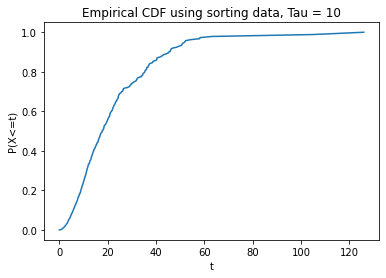

In [28]:
# plotting
plt.xlabel('t')
plt.ylabel('P(X<=t)')
  
plt.title('Empirical CDF using sorting data, Tau = 10')
plt.plot(seq1, emp_y1)

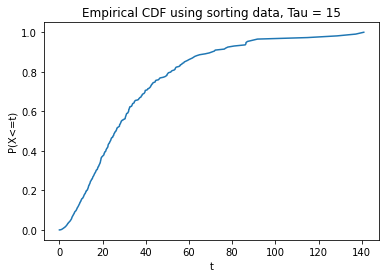

In [29]:
# plotting
plt.xlabel('t')
plt.ylabel('P(X<=t)')
  
plt.title('Empirical CDF using sorting data, Tau = 15')
plt.plot(seq2, emp_y2)

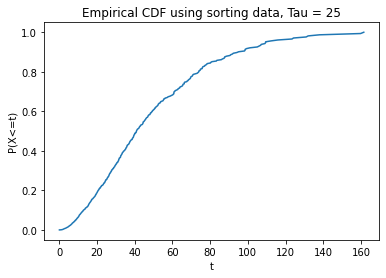

In [32]:
# plotting
plt.xlabel('t')
plt.ylabel('P(X<=t)')
  
plt.title('Empirical CDF using sorting data, Tau = 25')
plt.plot(seq3, emp_y3)

### Plotting the theoretical CDFs

Equation used for theoretical CDFs:<center><h3>
P( T $\leq$ $t_i$) = 1 - exp($-\lambda$$t_i$)
    </h3></center>

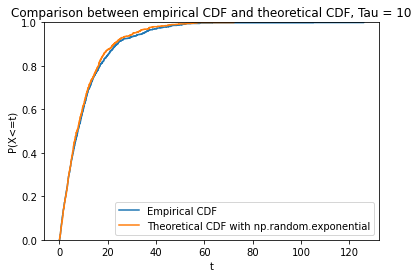

In [39]:

#plotting theoretical CDF with seaborn
size = 1000
sns.ecdfplot(seq1)
sns.ecdfplot(np.random.exponential(10, size))

plt.xlabel('t')
plt.ylabel('P(X<=t)')
plt.title('Comparison between empirical CDF and theoretical CDF, Tau = 10')
plt.legend([r"Empirical CDF", 
            r"Theoretical CDF with np.random.exponential"])
plt.show()

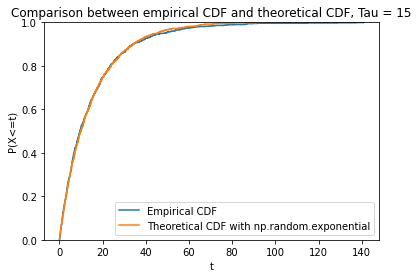

In [40]:
#plotting theoretical CDF with seaborn
size = 1000
sns.ecdfplot(seq2)
sns.ecdfplot(np.random.exponential(15, size))

plt.xlabel('t')
plt.ylabel('P(X<=t)')
plt.title('Comparison between empirical CDF and theoretical CDF, Tau = 15')
plt.legend([r"Empirical CDF", 
            r"Theoretical CDF with np.random.exponential"])
plt.show()

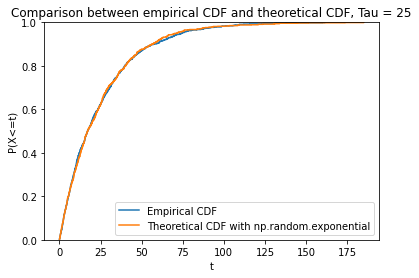

In [41]:
#plotting theoretical CDF with seaborn
size = 1000
sns.ecdfplot(seq3)
sns.ecdfplot(np.random.exponential(25, size))

plt.xlabel('t')
plt.ylabel('P(X<=t)')
plt.title('Comparison between empirical CDF and theoretical CDF, Tau = 25')
plt.legend([r"Empirical CDF", 
            r"Theoretical CDF with np.random.exponential"])
plt.show()